<a href="https://colab.research.google.com/github/ccosmin97/idc-prostate-mri-analysis/blob/main/plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Functions

In [168]:
def calculate_time_index(row, df_input, studyDateColName="image_StudyDate"): #assumes only two studies per PatientID
  other_study_time = df_input[(df_input["image_PatientID"] == row["image_PatientID"])
    & (df_input["StudyInstanceUID"] != row["StudyInstanceUID"])][studyDateColName].values[0]
  if row[studyDateColName] < other_study_time:
    return "T0"
  elif row[studyDateColName] > other_study_time:
    return "T1"
  else:
    return "T"

# Imports

In [110]:
import os
import numpy as np
import glob
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [111]:
import plotly.graph_objects as go
import plotly.express as px
# import colorcet as cc
import os
import plotly.io as pio

In [112]:
#colab
from google.colab import auth
auth.authenticate_user()
project_id = "idc-sandbox-003"
os.environ["GCP_PROJECT_ID"] = project_id
from google.cloud import bigquery
bq_client = bigquery.Client(os.environ["GCP_PROJECT_ID"])

# Data import

In [114]:
selection_query = f"""
SELECT *
FROM `idc-sandbox-003.prostate_benchmarking_neurips_2024.prostate_benchmark_simple_table_all_table`
 """
selection_result = bq_client.query(selection_query)
data_new_df = selection_result.result().to_dataframe()
data_new_df["asd"] = data_new_df.asd.replace(-999,np.NaN)

In [137]:
data_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774 entries, 0 to 2773
Data columns (total 59 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   segmentationInstanceUID               2774 non-null   object 
 1   StudyInstanceUID                      2774 non-null   object 
 2   sourceSegmentedSeriesUID              2774 non-null   object 
 3   expert_QuantityCodeMeaning            2774 non-null   object 
 4   expert_QuantityCodeValue              2774 non-null   object 
 5   expert_Value                          2774 non-null   object 
 6   expert_UnitsCodeValue                 2774 non-null   object 
 7   expert_UnitsCodeMeaning               2774 non-null   object 
 8   expert_findingSiteCodeValue           2774 non-null   object 
 9   expert_findingSiteCodeMeaning         2774 non-null   object 
 10  ai_QuantityCodeMeaning                2771 non-null   object 
 11  ai_QuantityCodeVa

# Figures

### Whole prostate quantitative analysis

In [117]:
data_new_df.algorithmNameCollection.unique()

array(['prostate158-prostate_mri_us_biopsy-prostate',
       'nnunet_task024-prostate_mri_us_biopsy-prostate',
       'prostate158-qin_prostate_repeatability-prostate',
       'nnunet_task05-qin_prostate_repeatability-prostate',
       'nnunet_task024-qin_prostate_repeatability-prostate',
       'prostate158-prostatex-zonal', 'prostate158-prostatex-prostate',
       'nnunet_task05-prostatex-prostate',
       'nnunet_task05-prostatex-zonal',
       'nnunet_task024-prostatex-prostate'], dtype=object)

In [118]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

<ipython-input-119-fb6a21f0bb1b>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



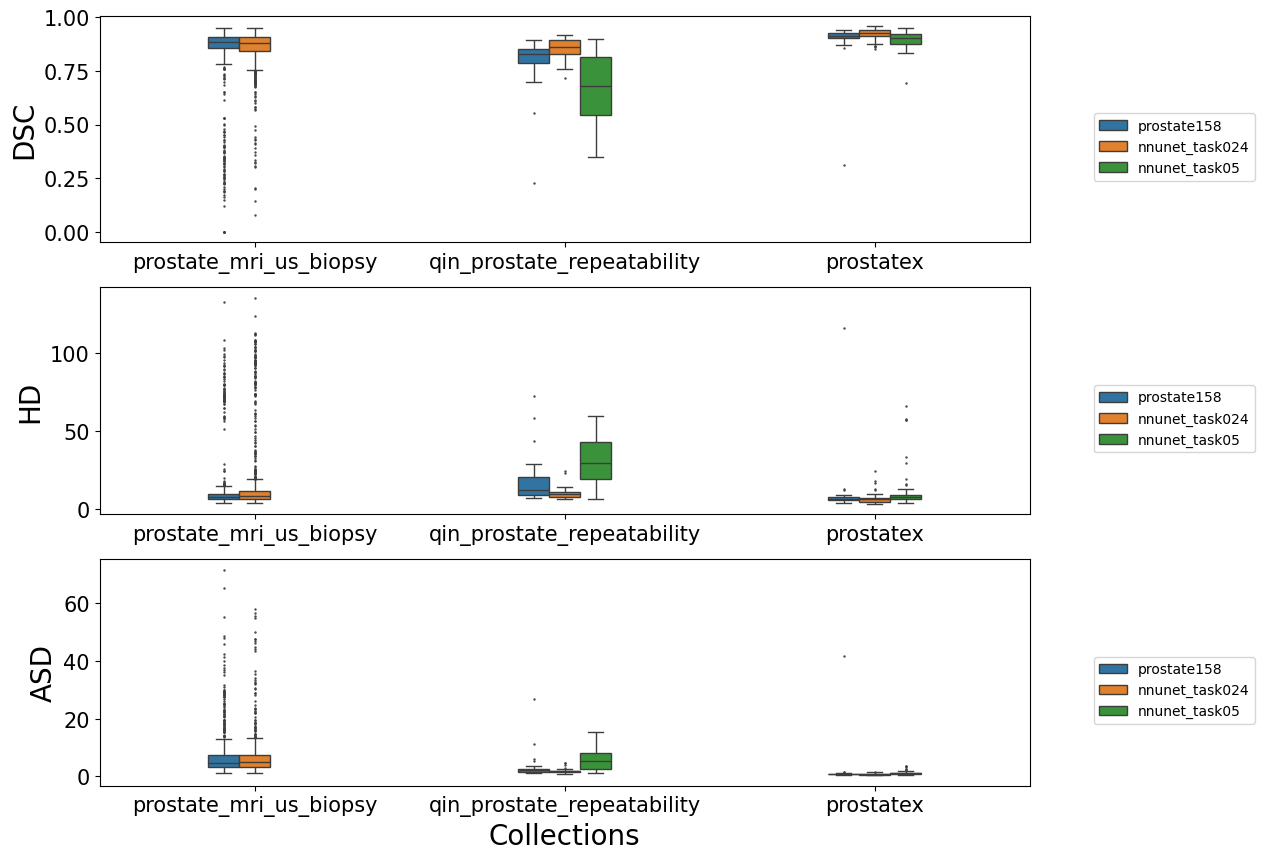

In [119]:
# fig, ax = plt.subplots() # define the axis object here
# plt.style.use('fivethirtyeight')
%matplotlib inline
# sns.reset_defaults()
plt.rcParams.update(plt.rcParamsDefault)              # <---- set markersize here
# plt.style.use('default')
# plt.rcParams.update({'font.size': 0.5})
plt.style.use('default')
sns.set(rc={'figure.dpi': 2000})
plt.style.use('default')
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))
plt.rcParams['figure.dpi'] = 2000
plt.style.use('default')
temp_df = data_new_df[(data_new_df.segment == 'Prostate')]
temp_df["algorithmNameCollection"] = temp_df.algorithmNameCollection.apply(lambda x : "-".join(x.split('-')[0:1]))
# temp_df = temp_df[temp_df.asd >= 0]#eliminate outliers set to -999
# sns.set_style('white'
a = sns.boxplot(data=temp_df, x="collection_id",
                     y="dsc",
                     hue="algorithmNameCollection", ax=ax1,
                     dodge=True, width=0.3, fliersize=0.7)
b = sns.boxplot(data=temp_df, x="collection_id",
                     y="hsdff",
                     hue="algorithmNameCollection", ax=ax2,
                     dodge=True, width=0.3, fliersize=0.7)
c = sns.boxplot(data=temp_df, x="collection_id",
                     y="asd",
                     hue="algorithmNameCollection", ax=ax3,
                     dodge=True, width=0.3, fliersize=0.7)
a.legend(loc='upper right', bbox_to_anchor=(1.25, 0.6))
b.legend(loc='upper right', bbox_to_anchor=(1.25, 0.6))
c.legend(loc='upper right', bbox_to_anchor=(1.25, 0.6))
ax1.tick_params(axis='both',labelsize=15)
ax1.set_ylabel('DSC', fontsize = 20.0) # Y label
ax1.set_xlabel('Collections', fontsize = 20) # X label
a.set(xlabel=None)
ax2.tick_params(axis='both',labelsize=15)
ax2.set_ylabel('HD', fontsize = 20.0) # Y label
ax2.set_xlabel('Collections', fontsize = 20) # X label
b.set(xlabel=None)
ax3.tick_params(axis='both',labelsize=15)
ax3.set_ylabel('ASD', fontsize = 20.0) # Y label
ax3.set_xlabel('Collections', fontsize = 20) # X label
#, ncol=1)
plt.show()

<ipython-input-120-3de71bf04012>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



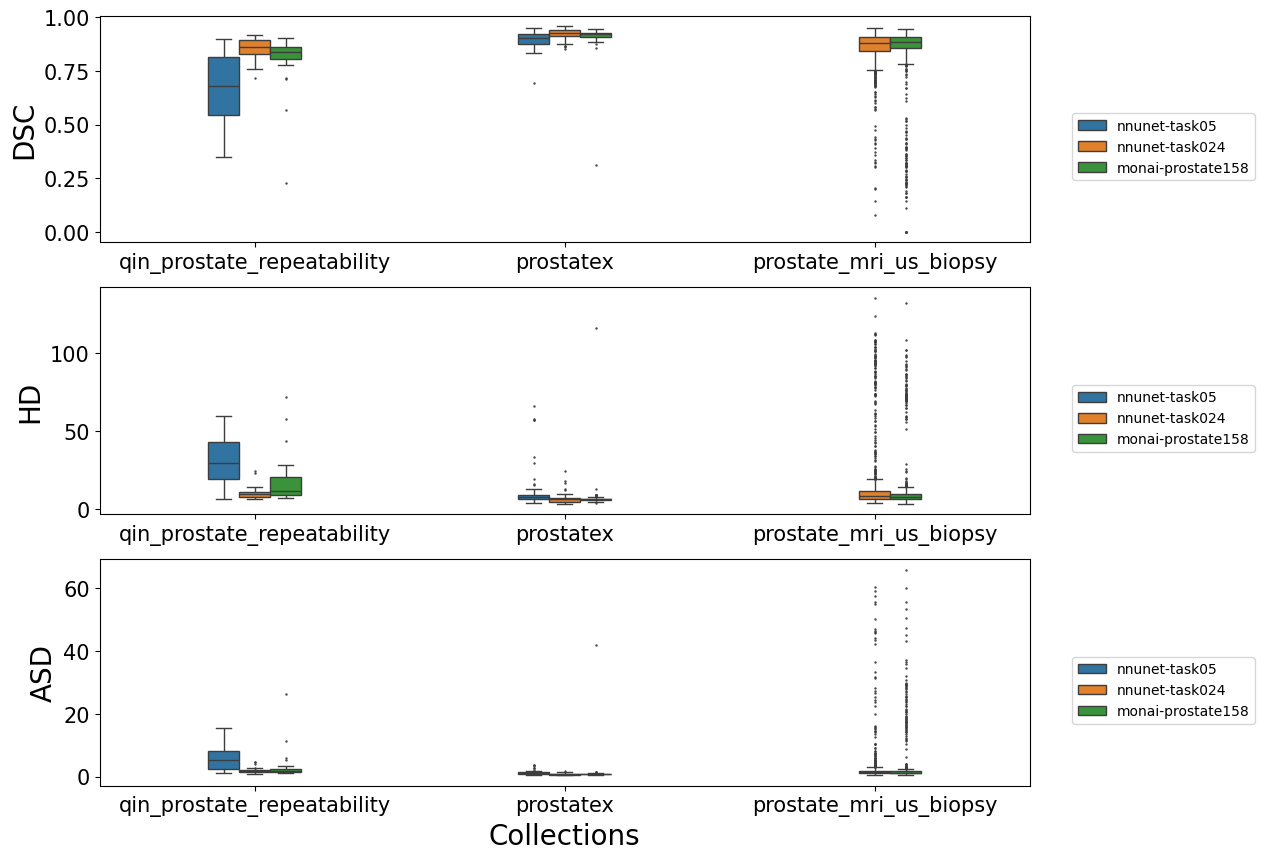

In [120]:
# fig, ax = plt.subplots() # define the axis object here
# plt.style.use('fivethirtyeight')
%matplotlib inline
# sns.reset_defaults()
plt.rcParams.update(plt.rcParamsDefault)              # <---- set markersize here
# plt.style.use('default')
# plt.rcParams.update({'font.size': 0.5})
plt.style.use('default')
sns.set(rc={'figure.dpi': 2000})
plt.style.use('default')
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))
plt.rcParams['figure.dpi'] = 2000
plt.style.use('default')
temp_df = data_df[(data_df.segment == 'Prostate')]
temp_df["algorithmNameCollection"] = temp_df.algorithmNameCollection.apply(lambda x : "-".join(x.split('-')[0:2]))
# temp_df = temp_df[temp_df.asd >= 0]#eliminate outliers set to -999
# sns.set_style('white'
a = sns.boxplot(data=temp_df, x="collection_id",
                     y="dsc",
                     hue="algorithmNameCollection", ax=ax1,
                     dodge=True, width=0.3, fliersize=0.7)
b = sns.boxplot(data=temp_df, x="collection_id",
                     y="hsdff",
                     hue="algorithmNameCollection", ax=ax2,
                     dodge=True, width=0.3, fliersize=0.7)
c = sns.boxplot(data=temp_df, x="collection_id",
                     y="asd",
                     hue="algorithmNameCollection", ax=ax3,
                     dodge=True, width=0.3, fliersize=0.7)
a.legend(loc='upper right', bbox_to_anchor=(1.25, 0.6))
b.legend(loc='upper right', bbox_to_anchor=(1.25, 0.6))
c.legend(loc='upper right', bbox_to_anchor=(1.25, 0.6))
ax1.tick_params(axis='both',labelsize=15)
ax1.set_ylabel('DSC', fontsize = 20.0) # Y label
ax1.set_xlabel('Collections', fontsize = 20) # X label
a.set(xlabel=None)
ax2.tick_params(axis='both',labelsize=15)
ax2.set_ylabel('HD', fontsize = 20.0) # Y label
ax2.set_xlabel('Collections', fontsize = 20) # X label
b.set(xlabel=None)
ax3.tick_params(axis='both',labelsize=15)
ax3.set_ylabel('ASD', fontsize = 20.0) # Y label
ax3.set_xlabel('Collections', fontsize = 20) # X label
#, ncol=1)
plt.show()

### Peripheral zone quantitative analysis

<ipython-input-121-1adebb4a3da5>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



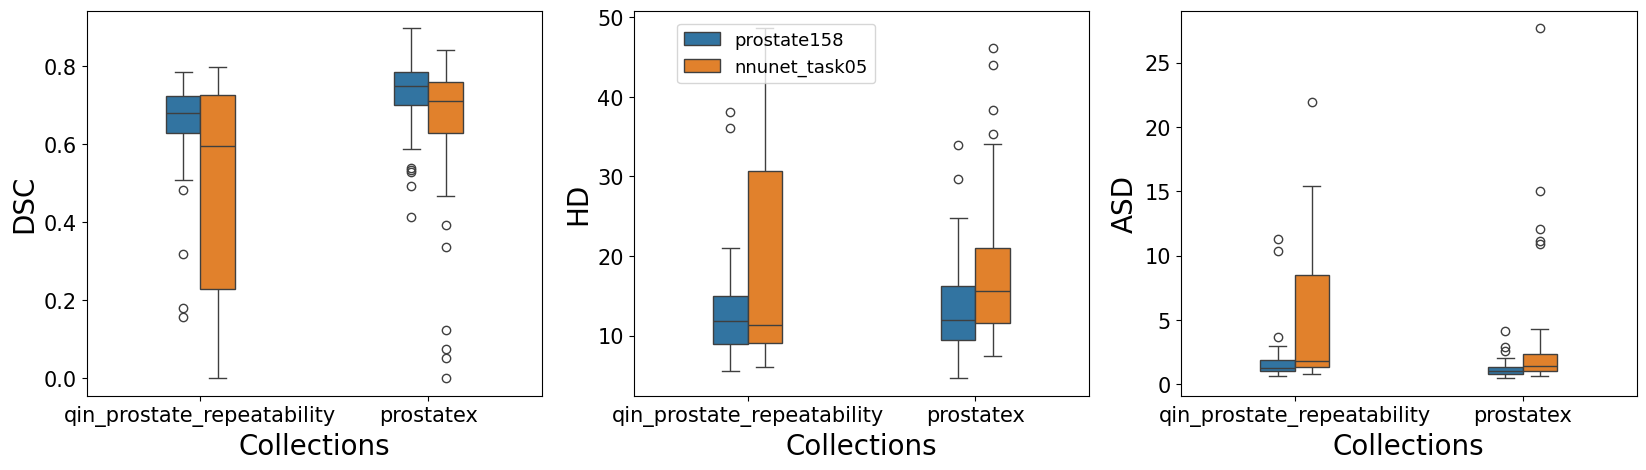

In [121]:
# fig, ax = plt.subplots() # define the axis object here
# plt.style.use('fivethirtyeight')
%matplotlib inline
# sns.reset_defaults()
plt.rcParams.update(plt.rcParamsDefault)
# plt.style.use('default')
plt.style.use('default')
sns.set(rc={'figure.dpi': 2000})
plt.style.use('default')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
plt.style.use('default')
temp_df = data_new_df[data_new_df.segment.str.contains('Peripheral')]
temp_df["algorithmNameCollection"] = temp_df.algorithmNameCollection.apply(lambda x : "-".join(x.split('-')[0:1]))
temp_df = temp_df[temp_df.asd >= 0]#eliminate outliers set to -999
# sns.set_style('white')
plt.rcParams.update({'font.size': 13})
# plt.rc('xtick', labelsize=20)
# plt.rc('ytick', labelsize=20)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=16)
a = sns.boxplot(data=temp_df, x="collection_id",
                     y="dsc",
                     hue="algorithmNameCollection", ax=ax1,
                     dodge=True, width=0.3)
# plt.tick_params(axis='both', which='major', labelsize=22)
b = sns.boxplot(data=temp_df, x="collection_id",
                     y="hsdff",
                     hue="algorithmNameCollection", ax=ax2,
                     dodge=True, width=0.3)
# plt.tick_params(axis='both', which='major', labelsize=22)
c = sns.boxplot(data=temp_df, x="collection_id",
                     y="asd",
                     hue="algorithmNameCollection", ax=ax3,
                     dodge=True, width=0.3)
# plt.tick_params(axis='both', which='major', labelsize=22)
ax1.tick_params(axis='both',labelsize=15)
ax1.set_ylabel('DSC', fontsize = 20.0) # Y label
ax1.set_xlabel('Collections', fontsize = 20) # X label
ax2.tick_params(axis='both',labelsize=15)
ax2.set_ylabel('HD', fontsize = 20.0) # Y label
ax2.set_xlabel('Collections', fontsize = 20) # X label
ax3.tick_params(axis='both',labelsize=15)
ax3.set_ylabel('ASD', fontsize = 20.0) # Y label
ax3.set_xlabel('Collections', fontsize = 20) # X label
ax1.get_legend().remove()
ax3.get_legend().remove()
# plt.rcParams.update({'font.size': 22})
b.legend(loc='upper right', bbox_to_anchor=(0.55, 0.99))
# b.legend(loc='upper right', bbox_to_anchor=(1.25, 0.6))
# c.legend(loc='upper right', bbox_to_anchor=(1.25, 0.6))
#, ncol=1)
plt.show()

### Peripheral zone quantitative analysis

<ipython-input-122-45f09b19c303>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



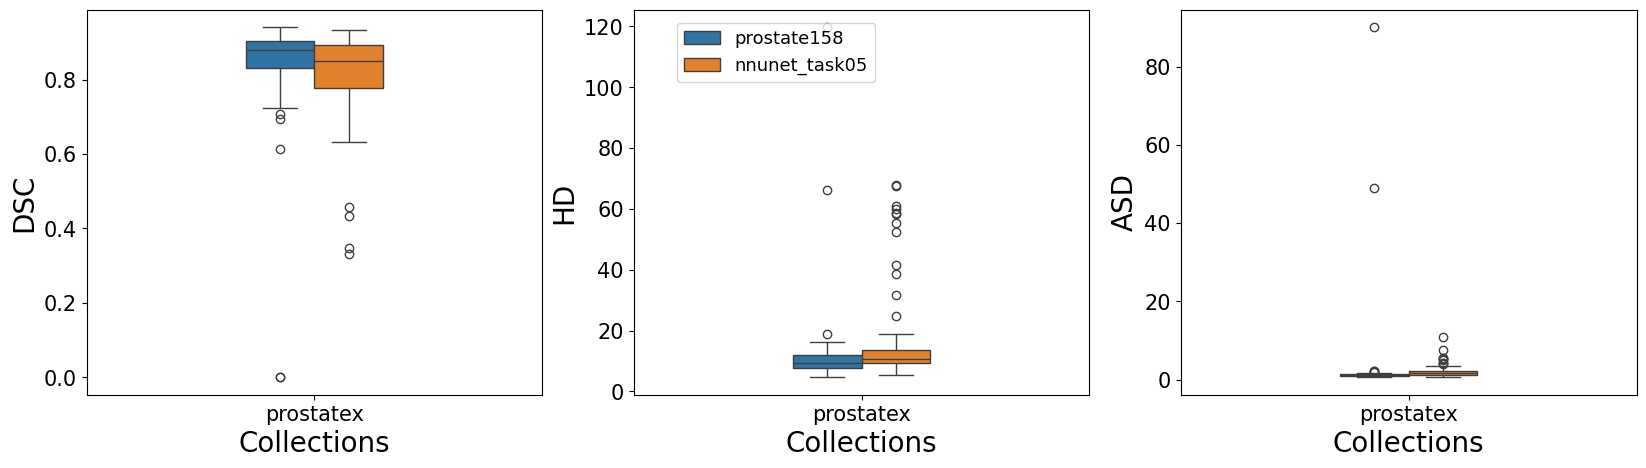

In [122]:
# fig, ax = plt.subplots() # define the axis object here
# plt.style.use('fivethirtyeight')
%matplotlib inline
# sns.reset_defaults()
plt.rcParams.update(plt.rcParamsDefault)
# plt.style.use('default')
plt.style.use('default')
sns.set(rc={'figure.dpi': 2000})
plt.style.use('default')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
plt.style.use('default')
temp_df = data_new_df[data_new_df.segment.str.contains('Transition')]
temp_df["algorithmNameCollection"] = temp_df.algorithmNameCollection.apply(lambda x : "-".join(x.split('-')[0:1]))
temp_df = temp_df[temp_df.asd >= 0]#eliminate outliers set to -999
# sns.set_style('white')
plt.rcParams.update({'font.size': 13})
# plt.rc('xtick', labelsize=20)
# plt.rc('ytick', labelsize=20)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=16)
a = sns.boxplot(data=temp_df, x="collection_id",
                     y="dsc",
                     hue="algorithmNameCollection", ax=ax1,
                     dodge=True, width=0.3)
# plt.tick_params(axis='both', which='major', labelsize=22)
b = sns.boxplot(data=temp_df, x="collection_id",
                     y="hsdff",
                     hue="algorithmNameCollection", ax=ax2,
                     dodge=True, width=0.3)
# plt.tick_params(axis='both', which='major', labelsize=22)
c = sns.boxplot(data=temp_df, x="collection_id",
                     y="asd",
                     hue="algorithmNameCollection", ax=ax3,
                     dodge=True, width=0.3)
# plt.tick_params(axis='both', which='major', labelsize=22)
ax1.tick_params(axis='both',labelsize=15)
ax1.set_ylabel('DSC', fontsize = 20.0) # Y label
ax1.set_xlabel('Collections', fontsize = 20) # X label
ax2.tick_params(axis='both',labelsize=15)
ax2.set_ylabel('HD', fontsize = 20.0) # Y label
ax2.set_xlabel('Collections', fontsize = 20) # X label
ax3.tick_params(axis='both',labelsize=15)
ax3.set_ylabel('ASD', fontsize = 20.0) # Y label
ax3.set_xlabel('Collections', fontsize = 20) # X label
ax1.get_legend().remove()
ax3.get_legend().remove()
# plt.rcParams.update({'font.size': 22})
b.legend(loc='upper right', bbox_to_anchor=(0.55, 0.99))
# b.legend(loc='upper right', bbox_to_anchor=(1.25, 0.6))
# c.legend(loc='upper right', bbox_to_anchor=(1.25, 0.6))
#, ncol=1)
plt.show()

## Repeatability analysis

In [123]:
temp_df = data_new_df[(data_new_df.segment == 'Prostate')
                  & (data_new_df.collection_id == 'qin_prostate_repeatability')]

In [124]:
temp_df.algorithmNameCollection.unique()

array(['prostate158-qin_prostate_repeatability-prostate',
       'nnunet_task05-qin_prostate_repeatability-prostate',
       'nnunet_task024-qin_prostate_repeatability-prostate'], dtype=object)

Whole prostate task024

In [125]:
temp_prostate_qin_task024_df = temp_df[temp_df.algorithmNameCollection == 'nnunet_task024-qin_prostate_repeatability-prostate']

In [126]:
temp_prostate_qin_task024_df['time_index'] = temp_prostate_qin_task024_df.apply(calculate_time_index,
                                    args = (temp_prostate_qin_task024_df,), axis=1)
temp_prostate_qin_task024_df["PID"] = temp_prostate_qin_task024_df.apply(lambda x: "PID_"\
                                                               +x["image_PatientID"].split('-')[1]\
                             +"_"+x["time_index"], axis=1)

<ipython-input-126-b1fcdeb0542f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-126-b1fcdeb0542f>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [127]:
# scatter plot using plotly
pio.templates["custom_nnUNet"] = go.layout.Template(layout=go.Layout(colorway=['#8b0000']))
pio.templates.default = 'custom_nnUNet'
temp_df_plot = temp_prostate_qin_task024_df.sort_values(by="PID").copy()
temp_df_plot["PID"] = temp_df_plot["PID"].apply(lambda x : "_".join(x.split("_")[1:]))
x_ticks_formatted = list(temp_df_plot["PID"].apply(lambda x : "        "+x.split("_")[0][-2:]).values)
x_ticks_formatted = [x if idx % 2 == 0 else "" for idx, x in enumerate(x_ticks_formatted)]
temp_df_plot["Volume of Mesh"] = temp_df_plot.ai_Value.apply(lambda x : x/1000)#convert to mL
# temp_df['PID'] = ['\n'.join(x.split("_")) for x in  temp_df['PID']]
fig_ai = px.line(temp_df_plot,
             x = "PID",
             y="Volume of Mesh",
             color="image_PatientID",
            #  hover_data=["PatientID"],
              markers=True,
              width=1100, height=400)
# initializing showlegend to "False"
fig_ai.update_layout(showlegend=True, font=dict(size=10), legend_title="",
                     legend=dict(
                      font=dict(size= 9)))
fig_ai.update_xaxes(tickangle=0, ticktext=x_ticks_formatted,
                        tickvals=list(temp_df_plot["PID"].values))
fig_ai.update_traces(showlegend=True)
for idx, trace in enumerate(fig_ai['data']):
  # if idx % 2 == 0 :
  trace["name"] = "nnunet-task024"
  # else:
    # trace["name"] = "AI segmentations"
# set showlegend property by name of trace
for idx, trace in enumerate(fig_ai['data']):
    if idx > 0: trace['showlegend'] = False

fig_ai.show()

Whole prostate task05

In [128]:
temp_prostate_qin_task025_df = temp_df[(temp_df.algorithmNameCollection == 'nnunet_task05-qin_prostate_repeatability-prostate') \
                                       & (temp_df.segment == 'Prostate')]

In [129]:
temp_prostate_qin_task025_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1625 to 1770
Data columns (total 59 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   segmentationInstanceUID               30 non-null     object 
 1   StudyInstanceUID                      30 non-null     object 
 2   sourceSegmentedSeriesUID              30 non-null     object 
 3   expert_QuantityCodeMeaning            30 non-null     object 
 4   expert_QuantityCodeValue              30 non-null     object 
 5   expert_Value                          30 non-null     object 
 6   expert_UnitsCodeValue                 30 non-null     object 
 7   expert_UnitsCodeMeaning               30 non-null     object 
 8   expert_findingSiteCodeValue           30 non-null     object 
 9   expert_findingSiteCodeMeaning         30 non-null     object 
 10  ai_QuantityCodeMeaning                30 non-null     object 
 11  ai_QuantityCodeValue 

In [130]:
temp_prostate_qin_task025_df['time_index'] = temp_prostate_qin_task025_df.apply(calculate_time_index,
                                    args = (temp_prostate_qin_task025_df,), axis=1)
temp_prostate_qin_task025_df["PID"] = temp_prostate_qin_task025_df.apply(lambda x: "PID_"\
                                                               +x["image_PatientID"].split('-')[1]\
                             +"_"+x["time_index"], axis=1)

<ipython-input-130-2b5a3eb3e266>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-130-2b5a3eb3e266>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [131]:
# scatter plot using plotly
pio.templates["custom_nnUNet"] = go.layout.Template(layout=go.Layout(colorway=['#0b6623']))
pio.templates.default = 'custom_nnUNet'
temp_df_plot = temp_prostate_qin_task025_df.sort_values(by="PID").copy()
temp_df_plot["PID"] = temp_df_plot["PID"].apply(lambda x : "_".join(x.split("_")[1:]))
x_ticks_formatted = list(temp_df_plot["PID"].apply(lambda x : "        "+x.split("_")[0][-2:]).values)
x_ticks_formatted = [x if idx % 2 == 0 else "" for idx, x in enumerate(x_ticks_formatted)]
temp_df_plot["Volume of Mesh"] = temp_df_plot.ai_Value.apply(lambda x : x/1000)#convert to mL
# temp_df['PID'] = ['\n'.join(x.split("_")) for x in  temp_df['PID']]
fig_ai2 = px.line(temp_df_plot,
             x = "PID",
             y="Volume of Mesh",
             color="image_PatientID",
              markers=True,
              width=1100, height=400)
# initializing showlegend to "False"
fig_ai2.update_layout(showlegend=True, font=dict(size=10), legend_title="",
                     legend=dict(
                      font=dict(size= 9)))
fig_ai2.update_xaxes(tickangle=0, ticktext=x_ticks_formatted,
                        tickvals=list(temp_df_plot["PID"].values))
fig_ai2.update_traces(showlegend=True)
for idx, trace in enumerate(fig_ai2['data']):
  # if idx % 2 == 0 :
  trace["name"] = "nnunet-task05"
  # else:
    # trace["name"] = "AI segmentations"
# set showlegend property by name of trace
for idx, trace in enumerate(fig_ai2['data']):
    if idx > 0: trace['showlegend'] = False

fig_ai2.show()

Whole prostate prostate158

In [132]:
temp_prostate_qin_monai_df = temp_df[(temp_df.algorithmNameCollection == 'prostate158-qin_prostate_repeatability-prostate') \
                                     & (temp_df.segment == 'Prostate')]

In [133]:
temp_df = data_new_df[(data_new_df.segment == 'Prostate')
                  & (data_new_df.collection_id == 'qin_prostate_repeatability')]
temp_prostate_qin_monai_df['time_index'] = temp_prostate_qin_monai_df.apply(calculate_time_index,
                                    args = (temp_prostate_qin_monai_df,), axis=1)
temp_prostate_qin_monai_df["PID"] = temp_prostate_qin_monai_df.apply(lambda x: "PID_"\
                                                               +x["image_PatientID"].split('-')[1]\
                             +"_"+x["time_index"], axis=1)

<ipython-input-133-0b86e716f6ac>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-133-0b86e716f6ac>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [134]:
# scatter plot using plotly
pio.templates["custom_nnUNet"] = go.layout.Template(layout=go.Layout(colorway=['#ffbf00']))
pio.templates.default = 'custom_nnUNet'
temp_df_plot = temp_prostate_qin_monai_df.sort_values(by="PID").copy()
temp_df_plot["PID"] = temp_df_plot["PID"].apply(lambda x : "_".join(x.split("_")[1:]))
x_ticks_formatted = list(temp_df_plot["PID"].apply(lambda x : "        "+x.split("_")[0][-2:]).values)
x_ticks_formatted = [x if idx % 2 == 0 else "" for idx, x in enumerate(x_ticks_formatted)]
temp_df_plot["Volume of Mesh"] = temp_df_plot.ai_Value.apply(lambda x : x/1000)#convert to mL
# temp_df['PID'] = ['\n'.join(x.split("_")) for x in  temp_df['PID']]
fig_ai3 = px.line(temp_df_plot,
             x = "PID",
             y="Volume of Mesh",
             color="image_PatientID",
            #  hover_data=["PatientID"],
              markers=True,
              width=1100, height=400)
# initializing showlegend to "False"
fig_ai3.update_layout(showlegend=True, font=dict(size=10), legend_title="",
                     legend=dict(
                      font=dict(size= 9)))
fig_ai3.update_xaxes(tickangle=0, ticktext=x_ticks_formatted,
                        tickvals=list(temp_df_plot["PID"].values))
fig_ai3.update_traces(showlegend=True)
for idx, trace in enumerate(fig_ai3['data']):
  # if idx % 2 == 0 :
  trace["name"] = "monai-prostate158"
  # else:
    # trace["name"] = "AI segmentations"
# set showlegend property by name of trace
for idx, trace in enumerate(fig_ai3['data']):
    if idx > 0: trace['showlegend'] = False

fig_ai3.show()

QIN whole prostate expert figure

In [135]:
###
temp_df_plot = temp_prostate_qin_task024_df.sort_values(by="PID").copy()
temp_df_plot["PID"] = temp_df_plot["PID"].apply(lambda x : "_".join(x.split("_")[1:]))
# scatter plot using plotly
#00FF0
pio.templates["custom_gt_idc"] = go.layout.Template(layout=go.Layout(colorway=['#00008b']))
pio.templates.default = 'custom_gt_idc'
x_ticks_formatted = list(temp_df_plot["PID"].apply(lambda x : "        "+x.split("_")[0][-2:]).values)
x_ticks_formatted = [x if idx % 2 == 0 else "" for idx, x in enumerate(x_ticks_formatted)]
temp_df_plot["Volume of Mesh"] = temp_df_plot.expert_Value.apply(lambda x : x/1000)#convert to mL
fig_gt_idc = px.line(temp_df_plot,
             x = "PID",
             y="Volume of Mesh",
            #  points="all",
             color="image_PatientID",
             hover_data=["image_PatientID"],
              markers=True,
              width=1100, height=400)

# initializing showlegend to "False"
fig_gt_idc.update_layout(showlegend=True, font=dict(size=12))
fig_gt_idc.update_layout(showlegend=True, font=dict(size=10), legend_title="",
                     legend=dict(
                      font=dict(size= 9)))
fig_gt_idc.update_xaxes(tickangle=0, ticktext=x_ticks_formatted,
                        tickvals=list(temp_df_plot["PID"].values))
for idx, trace in enumerate(fig_gt_idc['data']):
  # if idx % 2 == 0 :
  trace["name"] = "Expert"
  # else:
    # trace["name"] = "AI segmentations"
# set showlegend property by name of trace
for idx, trace in enumerate(fig_gt_idc['data']):
    if idx > 0: trace['showlegend'] = False
fig_gt_idc.show()

Combined whole prostate volume repeatability figure


In [136]:
### Combined

#legend idc
fig = go.Figure(data = fig_gt_idc.data + fig_ai.data + fig_ai2.data + fig_ai3.data)
fig.update_layout(showlegend=True)
fig.update_xaxes(tickangle=0, ticktext=x_ticks_formatted,
                        tickvals=list(temp_df_plot["PID"].values))
fig.update_layout(
                  width=1100, height=400,
                  title='QIN-Prostate-REPEATABILITY collection, repeatability study of volume between AI and expert whole prostate segmentations',
                  xaxis_title="CaseID",
                  yaxis_title="Volume, mL",
                  font=dict(size=10),
                  font_color="black")
fig.update_layout(margin=dict(l=80, r=80, t=80, b=80))
fig.update_layout(legend=dict(orientation = "v", yanchor="top",y=1,xanchor="right", x=1))
fig.show()